<a href="https://colab.research.google.com/github/SergeyS1954/CPT/blob/main/Expon_interv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

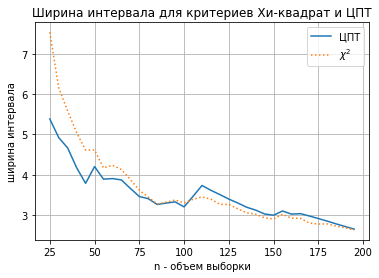

In [7]:
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
alpha = 0.05
gamma = 1 - alpha
f_1 = []
f_2 = []
for n in range (25, 200, 5):
        np.random.seed(123456712)
        test = np.random.exponential(10.,n)
        x = np.mean(test)
#        print ('n = ', n, ' x = ', x)
        # границы для приближения ЦПТ 
        l = (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n)
#        print('N01_low = ', x-l,'N01_high =' ,x + l, 'Delta1 = ', 2*l)
        # границы для приближения хи-квадрат (Двусторонняя оценка)
        theta_low = 2*n*x/chi2.ppf((1+gamma)/2, 2*n)
        theta_high = 2*n*x/chi2.ppf((1-gamma)/2, 2*n)
#       print('theta_low = ', theta_low, 'theta_high = ', theta_high, 'Delta2 = ',theta_high - theta_low)
        f_1.append(2* (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n))
        f_2.append(2*n*x/chi2.ppf((1-gamma)/2, 2*n) - 2*n*x/chi2.ppf((1+gamma)/2, 2*n))
n = np.arange(25,200,5)
fig = plt.figure()   # Отрисовка данных
plt.plot (n,f_1, '-', label = 'ЦПТ')
plt.plot (n, f_2, ':', label = '$\chi^2$')
plt.title('Ширина интервала для критериев Хи-квадрат и ЦПТ')   
plt.xlabel('n - объем выборки')  
plt.ylabel('ширина интервала')  
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig('expon_interv.jpg', dpi = 300)